State of Washington — This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department..

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

At this point, I have very little idea as to what i am working on. For now, I will look at the dataset

In [23]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [5]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10


To help me better in my analysis, i will be writing out description for each columns:

- `VIN (1-10)`: a unique code that identifies each vehicle. It is composed of 17 characters and is used to identify the vehicle’s manufacturer, model, and year of production.                                            
- `County`: county of the state where the vehicle was registered                                                 
- `City`   : city where the vehicle was registered                                                
- `State`  : state were the vehicle was registered                                               
- `Postal Code`  : postal code of the state were the vehicle was registered                                          
- `Model Year`  : year the model of the car was created                                           
- `Make`        : company that designed the car                                           
- `Model`   : specific type of the car designed                                             
- `Electric Vehicle Type` :          the type of electric vehicle the car is: BEVs or PHEVs                      
- `Clean Alternative Fuel Vehicle (CAFV) Eligibility`      : are these vehicles eligible to use use energy that comes from something other than petroleum (oil)
- `Electric Range `   : the distance an electric vehicle can travel before the battery needs to be recharged.                    - `Base MSRP`       :   MSRP stands for manufacturer's suggested retail price. It’s the price that car manufacturers recommend dealerships sell their vehicles for.                                    
- `Legislative District`:    a geographical area created to provide its population with representation in the larger state’s legislative body                             
- `DOL Vehicle ID`                    
- `Vehicle Location` : the geographical loaction of the vehicle                                       
- `Electric Utility`: company in the electric power industry that engages in electricity generation and distribution of electricity for sale generally in a regulated market.                                        
- `2020 Census Tract` : are small, relatively permanent statistical subdivisions of a county or equivalent entity, and were defined by local participants as part of the 2020 Census Participant Statistical Areas Program.     

In [84]:
df_copy = df.copy()

In [85]:
#fill null columns with null values <=10
df_copy.loc[:, ['County', 'City','Vehicle Location',
                'Electric Utility']] = df_copy.loc[:, ['County', 'City',
                                                       'Vehicle Location','Electric Utility']].fillna('not available')

In [86]:
#fill missing numerical columns with 0
df_copy.loc[:,['Electric Range','Base MSRP']] = df_copy.loc[:,['Electric Range','Base MSRP']].fillna(0)

In [87]:
df_copy.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                       0
2020 Census Tract                                      8
dtype: int64

Now we have the null values in `Model` and `legistrative District` to fix. For the `model` column, we will use the available vehicle information to see if we can get the model from this [website](https://vpic.nhtsa.dot.gov/decoder/Decoder)

In [88]:
df_copy[df_copy['Model'].isnull()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
419,YV4ED3UW1P,King,Seattle,WA,98146.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,34.0,227240163,POINT (-122.355145 47.50565500000005),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1241,YV4ED3UW1P,King,Seattle,WA,98125.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,46.0,236425430,POINT (-122.29638499999999 47.715580000000045),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1670,YV4ED3UM2P,King,North Bend,WA,98045.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,5.0,223998148,POINT (-121.78140119999995 47.49353160000004),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2673,YV4ED3UM0P,King,Bellevue,WA,98007.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,235094982,POINT (-122.14738499999999 47.59997500000003),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
3484,YV4ED3UW2P,King,Bellevue,WA,98005.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,224685695,POINT (-122.16084999999998 47.62451500000003),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132626,YV4ED3UW6P,Pierce,Graham,WA,98338.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,2.0,230267887,POINT (-122.29534009999998 47.07639610000007),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
133277,YV4ED3UM5P,King,Sammamish,WA,98074.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,229747206,POINT (-122.03132659999994 47.62857820000005),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
133309,YV4ED3UL8P,Snohomish,Lake Stevens,WA,98258.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,39.0,233870031,POINT (-122.11206499999997 48.00434500000006),PUGET SOUND ENERGY INC,5.306105e+10
134050,YV4ED3UM3P,King,Carnation,WA,98014.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,5.0,235064623,POINT (-121.91048029999996 47.64864000000006),CITY OF TACOMA - (WA)||TANNER ELECTRIC COOP,5.303303e+10


Upon investigation, it looks like the model for this vehicle are not available. Coincidentally, they are 2023 cars, so we will just replace the null rows with `not available`

In [96]:
df_copy.loc[:,'Model'] = df_copy.loc[:,'Model'].fillna('not available')

Now, let's look at `legistrative district` column. This column dont have much relevant to this analysis so we will just drop it.

In [106]:
df_copy.drop(['Legislative District'],axis=1,inplace=True)

There is no state that has the abbreviation `AP` and `BC` so we will remove those rows.

In [123]:
df_copy = df_copy[~df_copy['State'].isin(['AB', 'BC'])]

We well state by mapping out this states and renaming them.

In [127]:
countries_rename= {
    'WA': 'Washington', 'CA':'Califonia', 'AZ':'Arizona',
     'IL':'Illinois', 'KS':'Kansas', 'VA':'Virginia', 'NE':'Nebraska',
    'DC':"District of Columbia", 'MD':'Maryland', 'TX':'Texas',
       'NV':'Nevada', 'UT':'Utah', 'GA':'Georgia', 'NC':'North Carolina', 
    'SC':'South Carolina', 'MO':'Missouri', 'CO':'Connecticut', 'AR':'Arkansas', 
    'FL':'Florida', 'NJ':'New Jersey', 'ID':'Idaho',
       'HI':'Hawaii', 'MI':'Michigan', 'DE':'Delaware', 'OR':'Oregon', 
    'LA':'Louisiana', 'OH':'Ohio', 'NM':'New Mexico', 'WY':'Wyoming', 
    'TN':'Tennessee', 'OK':'Oklahoma', 'KY':'Kentucky',
       'AL':'Alabama', 'MS':'Mississippi', 'PA':'Pennsylvania', 'CT':'Connecticut', 
    'IN':'Indiana', 'NY':'New York', 'AK':'Alaska', 'MA':'Massachusetts', 'MT':'Montana', 
    'NH':'New Hampshire','RI':'Rhode Island', 'MN':'Minnesota'
}

df_copy.replace(countries_rename,inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_15268\1078199939.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.replace(countries_rename,inplace=True)


In [138]:
#rename the row
df_copy['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df_copy['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].replace('Clean Alternative Fuel Vehicle Eligible','Eligible')

## 2. Analysis

We are going to answer the following questions from this analysis...

- How many unique vehicle models are in the dataset?
- What are the different makes of electric vehicles present in the dataset?
- What is the distribution of electric vehicle types (BEV, PHEV) in the dataset?
- Which county has the highest number of electric vehicles?
- What is the average electric range of the electric vehicles?
- What is the most common electric utility associated with the electric vehicles?
- Are there any electric vehicles with a base MSRP of $0?

- How many electric vehicles are eligible for clean alternative fuel vehicle (CAFV) incentives?
- How many electric vehicles were registered in each year?

### 1. How many unique vehicle models are in the dataset?

In [145]:
df_copy['Model'].nunique()

126

### 2. What are the different makes of electric vehicles present in the dataset?

In [147]:
df_copy['Make'].nunique()

36

### 3. What is the distribution of electric vehicle types (BEV, PHEV) in the dataset?

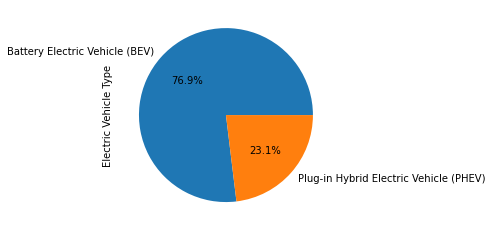

In [160]:
df_copy['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%');
#plt.axis('equal') ; # Equal aspect ratio ensures a circular pie chart

### 4. Which county has the highest number of electric vehicles?

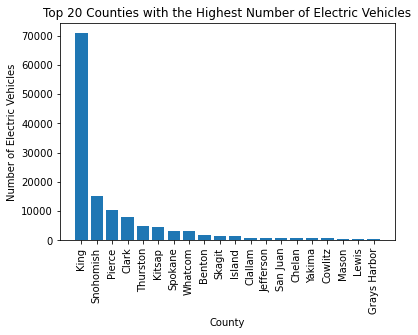

In [171]:
import matplotlib.pyplot as plt

top_20_county_counts = df_copy['County'].value_counts().nlargest(20)

plt.bar(top_20_county_counts.index, top_20_county_counts.values)
plt.xlabel('County')
plt.ylabel('Number of Electric Vehicles')
plt.title('Top 20 Counties with the Highest Number of Electric Vehicles')
plt.xticks(rotation=90);

### 5. What is the most common electric utility associated with the electric vehicles?

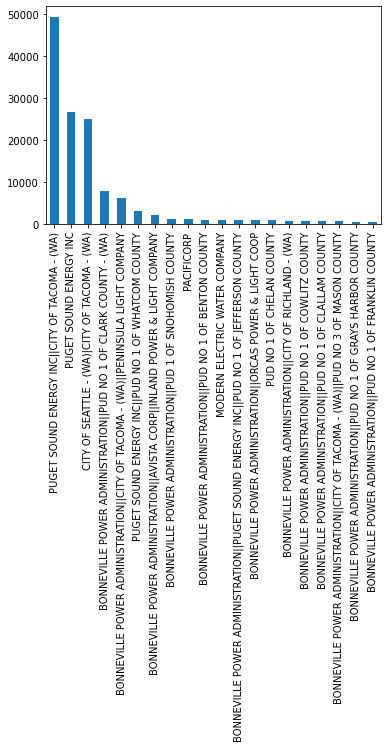

In [181]:
df_copy['Electric Utility'].value_counts().nlargest(20).plot.bar();

### 6 Are there any electric vehicles with a base MSRP of $0?

In [190]:
len(df_copy[df_copy['Base MSRP'] == 0])

131612

### 7. How many electric vehicles are eligible for clean alternative fuel vehicle (CAFV) incentives?

In [197]:
df_copy[df_copy['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Eligible'].shape[0]

61219

### 8. How many electric vehicles were registered in each year?

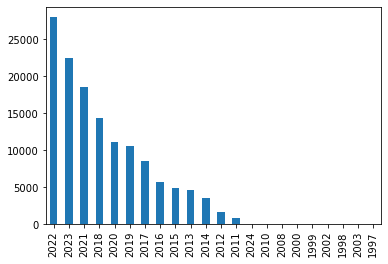

In [204]:
df_copy['Model Year'].value_counts().sort_values(ascending=False).plot.bar();